In [1]:
pip install wordfreq

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pytrends

In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from wordfreq import word_frequency
import csv

In [3]:
#regex, find out the tags
file = open("Ad Settings.html", "r")
ad=file.read()
regex='<div class="c7O9k">((\w| |-|:)+)'
a=re.findall(regex,ad)

In [51]:
#clean tags and turn them to list
lst=[]
num=0
for ele in a:
    lst.append([ele[0]][0].strip())
#for num in range(len(lst)):
    #lst[num]=lst[num].replace(' ','_')
lst.remove('18-34 years old')
lst.remove('Roleplaying Games')
lst.remove('Language: English and 2 more')
lst.remove('Homeownership Status: Homeowners')
lst.remove('Household Income: Upper Middle')
lst.remove('Parental Status: Not A Parent')
lst.remove('Marital Status: Single')
lst

['Male',
 'Action',
 'Adventure Games',
 'Apparel',
 'Autos',
 'Beauty',
 'Books',
 'Burgers',
 'Business News',
 'Business Services',
 'Camera',
 'Career Resources',
 'Celebrities',
 'Classical Music',
 'Coffee',
 'Combat Sports',
 'Comics',
 'Computer',
 'Computer Components',
 'Computer Peripherals',
 'Computers',
 'Construction',
 'Consumer Electronics',
 'Cooking',
 'Dance',
 'DJ Resources',
 'Dogs',
 'Fashion',
 'Fast Food',
 'Flowers',
 'Food',
 'Gourmet',
 'Greeting Cards',
 'Home Improvement',
 'Horror Films',
 'Hospitality Industry',
 'Inheritance',
 'Job Listings',
 'Living Room Furniture',
 'Local News',
 'Mass Merchants',
 'Mobile Phones',
 'Movies',
 'Moving',
 'Music',
 'News',
 'Pet Food',
 'Pets',
 'Politics',
 'Pop Music',
 'Printers',
 'Product Reviews',
 'Restaurants',
 'Sedans',
 'Shopping',
 'Snack Foods',
 'Social Networks',
 'Sofas',
 'Sports',
 'Strategy Games',
 'Swimwear',
 'Travel',
 'TV Dramas',
 'TV Networks',
 'TV Sci-Fi',
 'Urban Transit',
 'Used Vehicle

In [52]:
#measure occurance and turn to dic
dic={}
num=0
for word in lst:
    if word not in dic:
        dic[word]=1
    else:
        dic[word]+=1
dic

{'Male': 1,
 'Action': 1,
 'Adventure Games': 1,
 'Apparel': 1,
 'Autos': 1,
 'Beauty': 1,
 'Books': 1,
 'Burgers': 1,
 'Business News': 1,
 'Business Services': 1,
 'Camera': 1,
 'Career Resources': 1,
 'Celebrities': 1,
 'Classical Music': 1,
 'Coffee': 1,
 'Combat Sports': 1,
 'Comics': 1,
 'Computer': 1,
 'Computer Components': 1,
 'Computer Peripherals': 1,
 'Computers': 1,
 'Construction': 1,
 'Consumer Electronics': 1,
 'Cooking': 1,
 'Dance': 1,
 'DJ Resources': 1,
 'Dogs': 1,
 'Fashion': 1,
 'Fast Food': 1,
 'Flowers': 1,
 'Food': 1,
 'Gourmet': 1,
 'Greeting Cards': 1,
 'Home Improvement': 1,
 'Horror Films': 1,
 'Hospitality Industry': 1,
 'Inheritance': 1,
 'Job Listings': 1,
 'Living Room Furniture': 1,
 'Local News': 1,
 'Mass Merchants': 1,
 'Mobile Phones': 1,
 'Movies': 1,
 'Moving': 1,
 'Music': 1,
 'News': 1,
 'Pet Food': 1,
 'Pets': 1,
 'Politics': 1,
 'Pop Music': 1,
 'Printers': 1,
 'Product Reviews': 1,
 'Restaurants': 1,
 'Sedans': 1,
 'Shopping': 1,
 'Snack Foo

In [53]:
#calculate relative word frequency 
df2=pd.DataFrame.from_dict(dic,orient='index',columns=['occurance'])
df2['word']=df2.index
df2

,occurance,word
Male,1,Male
Action,1,Action
Adventure Games,1,Adventure Games
Apparel,1,Apparel
Autos,1,Autos
...,...,...
Visual Art,1,Visual Art
World Music,1,World Music
Yoga,1,Yoga
Photographic,1,Photographic


In [54]:
def word_freq_cal(word):
    return float(word_frequency(word, 'en'))
df2['word_fre']=df2['word'].apply(word_freq_cal)
df2['final']=df2['occurance']/df2['word_fre']
df2['final']=round(df2['final']/df2['final'].min())
df2['final']

Male                 4.0
Action               2.0
Adventure Games     13.0
Apparel             63.0
Autos              251.0
                   ...  
Visual Art          12.0
World Music          1.0
Yoga                21.0
Photographic        58.0
Performing Arts     16.0
Name: final, Length: 72, dtype: float64

In [58]:
#use _ to prevent word splitting
def uniting(word):
    word=word.replace('-','_')
    return word.replace(' ','_')
df2.index=df2['word'].apply(uniting)
df2

,occurance,word,word_fre,final
word,,,,
Male,1,Male,0.000078,4.0
Action,1,Action,0.000178,2.0
Adventure_Games,1,Adventure Games,0.000026,13.0
Apparel,1,Apparel,0.000005,63.0
Autos,1,Autos,0.000001,251.0
...,...,...,...,...
Visual_Art,1,Visual Art,0.000027,12.0
World_Music,1,World Music,0.000232,1.0
Yoga,1,Yoga,0.000016,21.0


In [61]:
#create the final word str
final_word_str=''
dict_final=df2['final'].to_dict()
dict_final
for word in dict_final:   
    print(word)
    for num in range(int(dict_final[word])):
        final_word_str+=word
        final_word_str+=' '

Male
Action
Adventure_Games
Apparel
Autos
Beauty
Books
Burgers
Business_News
Business_Services
Camera
Career_Resources
Celebrities
Classical_Music
Coffee
Combat_Sports
Comics
Computer
Computer_Components
Computer_Peripherals
Computers
Construction
Consumer_Electronics
Cooking
Dance
DJ_Resources
Dogs
Fashion
Fast_Food
Flowers
Food
Gourmet
Greeting_Cards
Home_Improvement
Horror_Films
Hospitality_Industry
Inheritance
Job_Listings
Living_Room_Furniture
Local_News
Mass_Merchants
Mobile_Phones
Movies
Moving
Music
News
Pet_Food
Pets
Politics
Pop_Music
Printers
Product_Reviews
Restaurants
Sedans
Shopping
Snack_Foods
Social_Networks
Sofas
Sports
Strategy_Games
Swimwear
Travel
TV_Dramas
TV_Networks
TV_Sci_Fi
Urban_Transit
Used_Vehicles
Visual_Art
World_Music
Yoga
Photographic
Performing_Arts


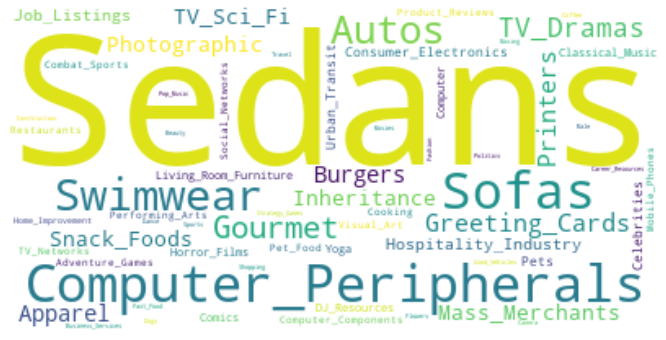

In [60]:
#create word cloud
wordcloud = WordCloud(max_font_size=1000, max_words=100, collocations=False,background_color="white",stopwords=['Status','years','old','and','more','Roleplaying']).generate(final_word_str)
plt.figure(figsize=(20,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()